# 1.Linear regression
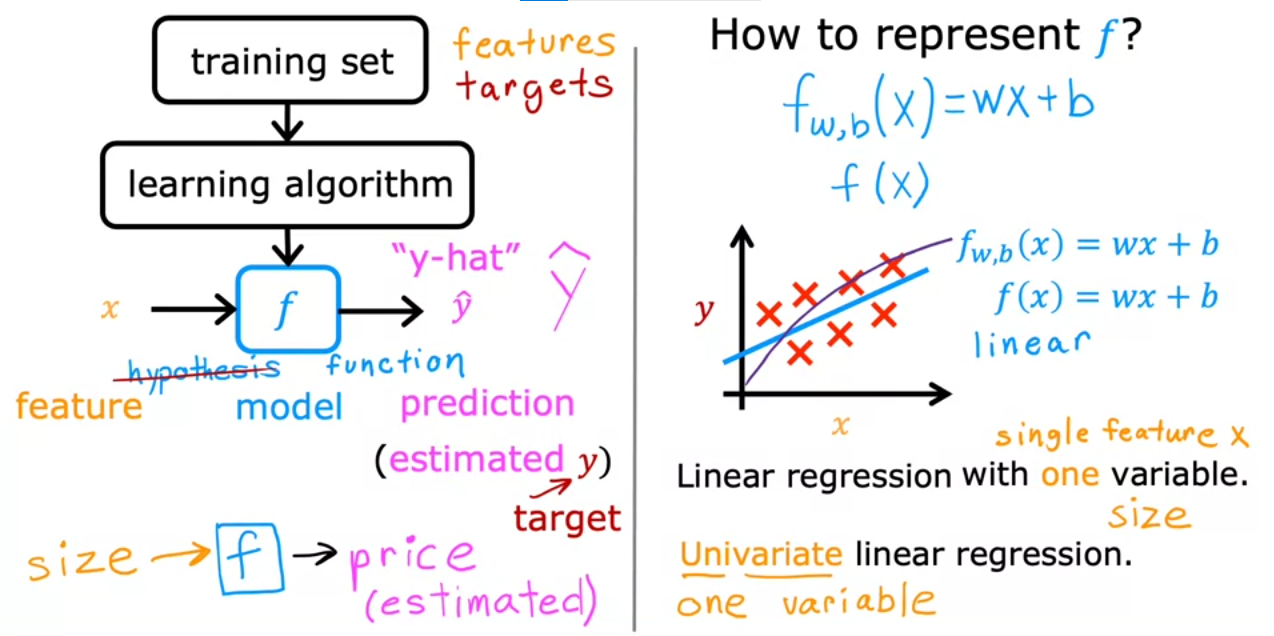

In [1]:
import torch
from torch import nn
import numpy
import matplotlib.pyplot as plt


In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}") 

Using device cpu


## Creating data

In [3]:
start = 0
end = 1
step = 0.01

w=0.7
b=1
import random
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y =w*X+b
Y += 0.3*torch.rand(Y.size())

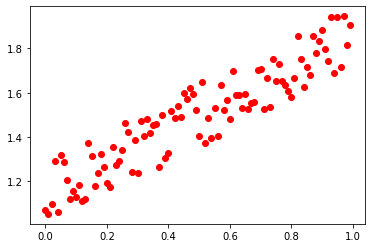

In [4]:
plt.xlabel='X-osa'
plt.ylabel='Y-osa'
plt.scatter(X,Y,c='r')

# Splitting data into train and test set

In [5]:
train_split = int(.8*len(X))

#train set
X_train = X[:train_split]
Y_train = Y[:train_split]

print(f"Train set has :{len(X_train)} elements")
print(f"Train set has :{len(Y_train)} elements")

#test set
X_test = X[train_split:]
Y_test = Y[train_split:]

print(f"Train set has :{len(X_test)} elements")
print(f"Train set has :{len(Y_test)} elements")


Train set has :80 elements
Train set has :80 elements
Train set has :20 elements
Train set has :20 elements


In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype = torch.float),
                                requires_grad= True)
    self.bias = nn.Parameter(torch.randn(1,
                                            dtype = torch.float),
                                requires_grad= True)
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias


In [7]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

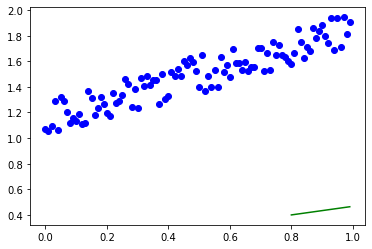

In [8]:
with torch.inference_mode():
  y_preds = model_0(X_test) #smece

plt.scatter(X,Y,c='b')
plt.plot(X_test,y_preds,c='g')

# Model training

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [10]:
torch.manual_seed(42)

epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test.type(torch.float))
  
  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch {epoch} : | MAE Train loss : {loss} | MAE Test loss: {test_loss} ")


Epoch 0 : | MAE Train loss : 1.157335877418518 | MAE Test loss: 1.3426368236541748 
Epoch 50 : | MAE Train loss : 0.5793235898017883 | MAE Test loss: 0.6658746600151062 
Epoch 100 : | MAE Train loss : 0.08386103063821793 | MAE Test loss: 0.08908890932798386 
Epoch 150 : | MAE Train loss : 0.07569088041782379 | MAE Test loss: 0.0781618133187294 
Epoch 200 : | MAE Train loss : 0.07566652446985245 | MAE Test loss: 0.07791538536548615 
Epoch 250 : | MAE Train loss : 0.07566238194704056 | MAE Test loss: 0.0778590515255928 
Epoch 300 : | MAE Train loss : 0.07566233724355698 | MAE Test loss: 0.07786212116479874 
Epoch 350 : | MAE Train loss : 0.07566233724355698 | MAE Test loss: 0.07782657444477081 
Epoch 400 : | MAE Train loss : 0.07566238939762115 | MAE Test loss: 0.07785932719707489 
Epoch 450 : | MAE Train loss : 0.07566232979297638 | MAE Test loss: 0.07786241173744202 
Epoch 500 : | MAE Train loss : 0.07566237449645996 | MAE Test loss: 0.07782686501741409 
Epoch 550 : | MAE Train loss : 

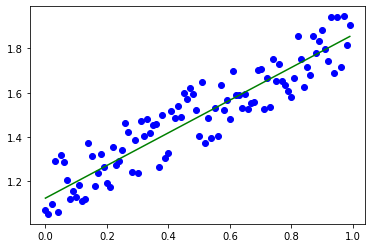

In [11]:
plt.scatter(X,Y,c='b')
plt.plot(X,model_0.weights.detach() * X + model_0.bias.detach(), c='g')

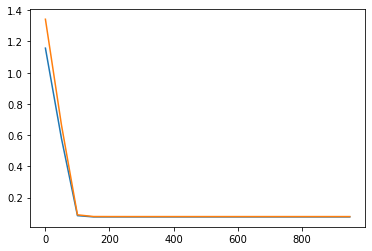

In [12]:
plt.plot(epoch_count, train_loss_values)
plt.plot(epoch_count, test_loss_values)